In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
df = pd.read_csv('/Users/sergey/ds_bootcamp/ds-phase-0/RealEstate/RealEstbyMW/_data.csv')

In [3]:
df.drop(df[df['Адрес'].str.startswith('Санкт-Петербург')].index, inplace = True)
df.drop(df[df['Адрес'].str.startswith('Краснодарский край')].index, inplace = True)
df.shape

(19737, 25)

In [4]:
# df['Площадь, м2'].str.split('/') # Этот код разбивает значения в столбце 'Площадь, м2' на несколько частей по символу "/"


In [5]:
# Этот код создает новый столбец 'Общая площадь' в датафрейме df
# Значения этого столбца получаются из первой части значений в столбце 'Площадь, м2',
# которые были разделены на несколько частей по символу "/" с помощью предыдущего метода split()
df['Общая площадь'] = df['Площадь, м2'].str.split('/').str.get(0).astype(float,)


# Здесь мы используем метод .agg для вычисления нескольких статистических показателей
# из столбца 'Общая площадь' в DataFrame df.
# Мы передаем список строковых значений ['mean', 'min', 'max'] в качестве аргумента метода .agg,
# чтобы вычислить среднее значение, минимальное значение и максимальное значение этого столбца.

stats = df['Общая площадь'].agg(['mean', 'min', 'max'])

print("Средняя площадь, м2: ", stats['mean'])
print("Минимальная площадь, м2: ", stats['min'])
print("Максимальная площадь, м2: ", stats['max'])






Средняя площадь, м2:  63.56484774788468
Минимальная площадь, м2:  7.0
Максимальная площадь, м2:  811.0


Средняя цена аренды, тыс\руб:  86563.85473982875
Минимальная цена аренды, тыс\руб:  5000.0
Максимальная цена аренды, тыс\руб:  3000000.0


<Axes: xlabel='Цена аренды', ylabel='Count'>

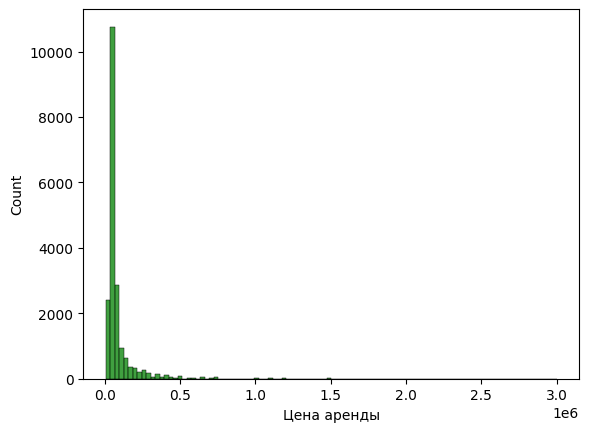

In [6]:
# Этот код разбивает значения в столбце 'Цена' на отдельные фрагменты по точке
# Разделитель точка передается в метод split()
# Затем метод get(0) извлекает первый фрагмент из каждого полученного значения, который содержит целую часть числа до точки
# Далее, метод astype(float) преобразует полученную строку с целой частью числа к типу float
# Результат сохраняется в новом объекте pandas Series, содержащем только целые части чисел из столбца 'Цена' в формате int
df['Цена аренды'] = df['Цена'].str.split('.').str.get(0).astype(int)

# pd.options.display.float_format = '{:,.1f}'
rent_stats = df['Цена аренды'].agg(['mean', 'min', 'max'])

print("Средняя цена аренды, тыс\руб: ", rent_stats['mean'])
print("Минимальная цена аренды, тыс\руб: ", rent_stats['min'])
print("Максимальная цена аренды, тыс\руб: ", rent_stats['max'])


sns.histplot(x='Цена аренды', data=df, bins=100, color='green')

In [7]:
df['Кол-во комнат'] = df['Количество комнат'].str.split(',').str.get(0).astype(float)


<Axes: xlabel='Цена аренды', ylabel='Общая площадь'>

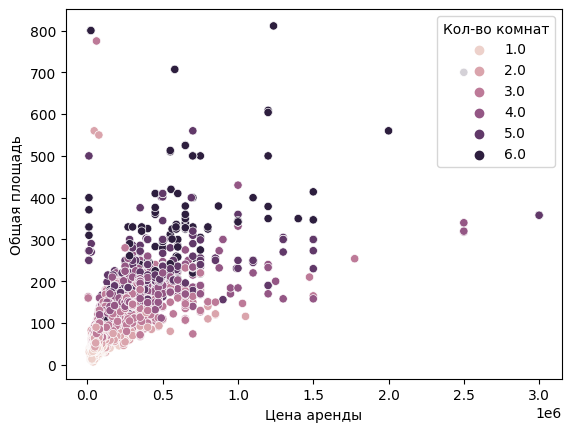

In [8]:
# Этот код группирует строки в датафрейме df по значениям столбцов 'Цена' и 'Общая площадь'
# Новый датафрейм new_df будет содержать уникальные комбинации значений этих двух столбцов
# as_index=False указывает, что новый датафрейм не должен использовать значения группировки в качестве индекса строк
# new_df = df.groupby(['Цена аренды', 'Общая площадь'], as_index=False)

import numpy as np
grouped_df = df.groupby('Цена аренды')[['Общая площадь', 'Количество комнат']]
new_df = df[['Цена аренды','Общая площадь', 'Кол-во комнат']]
new_df
sns.scatterplot(data=new_df, x='Цена аренды', y='Общая площадь', hue='Кол-во комнат')
# sns.relplot(x="Цена аренды", y="Общая площадь", data=new_df )
# plt.set_xticks(np.arange(0, 200000, 20000))





In [9]:
df['Площадь, м2'].str.split('/') # Этот код разбивает значения в столбце 'Площадь, м2' на несколько частей по символу "/"


0              [200.0, 20.0]
1        [198.0, 95.0, 18.0]
2        [200.0, 116.0, 4.0]
3        [170.0, 95.0, 17.0]
4          [58.0, 38.0, 5.0]
                ...         
23363      [35.0, 16.4, 8.0]
23364     [38.7, 16.5, 11.0]
23365                 [43.1]
23366           [52.5, 10.0]
23367     [90.0, 48.2, 15.5]
Name: Площадь, м2, Length: 19737, dtype: object